# **FORMATIVE ASSIGNMENT**
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

Q1. Perform basic EDA

Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method

Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

Q5. Check the correlation between all the numerical columns and plot heatmap.

Q6. Draw Scatter plot between the variables to check the correlation between them.

Dataset : https://drive.google.com/file/d/1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P/view?usp=sharing


In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house_price = pd.read_csv("//content//house_price.csv")

In [ ]:
house_price

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### Dataset information
Welcome to price examine and analysis of the dataset.  This dataset provides insights into house price examine which include 13200 records and 7 attributes.




In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
house_price.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

 There is no null valuses here.

### Initial Information About The Dataset
We are going to display initial information of the dataset to get primary knowledge of the data's structure and values.

Displaying the first 5 rows of the dataset to get a glimpse of the data.
Checking the shape of the dataset (number of rows and columns).
Exploring the column names and data types.
Descriptive Statistics includes:
Numeric Variables.

1. Numeric variable
2.
Categorical Variables.




In [ ]:
first_5 = house_price.head()
first_5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
print("The shape",house_price.shape)

num_rows, num_cols =house_price.shape
num_features = num_cols - 1
num_data = num_rows * num_cols
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")


The shape (13200, 7)
Number of Rows: 13200
Number of Columns: 7
Number of Features: 6
Number of All Data: 92400


In [ ]:
house_price.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.30,1237.32,1.0,1100.0,1275.00,1672.0,52272.0
bath,13200.0,2.69,1.34,1.0,2.0,2.00,3.0,40.0
price,13200.0,112.28,149.18,8.0,50.0,71.85,120.0,3600.0
bhk,13200.0,2.80,1.29,1.0,2.0,3.00,3.0,43.0
price_per_sqft,13200.0,7920.34,106727.16,267.0,4267.0,5438.00,7317.0,12000000.0


In [ ]:
house_price.describe(include=object).T

,count,unique,top,freq
location,13200,241,other,2872
size,13200,31,2 BHK,5192


In [ ]:
house_size=house_price["size"].value_counts()
house_size


size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

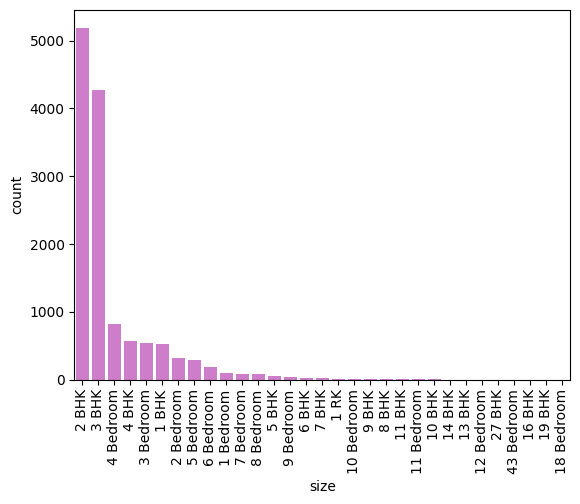

In [ ]:
sns.barplot(data=house_size,color="orchid")
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_distribution(column, title):
    plt.figure(figsize=(8,6))
    sns.histplot(house_price, x=column, kde=True,color="pink")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


###Visualising the distibution of numerical data

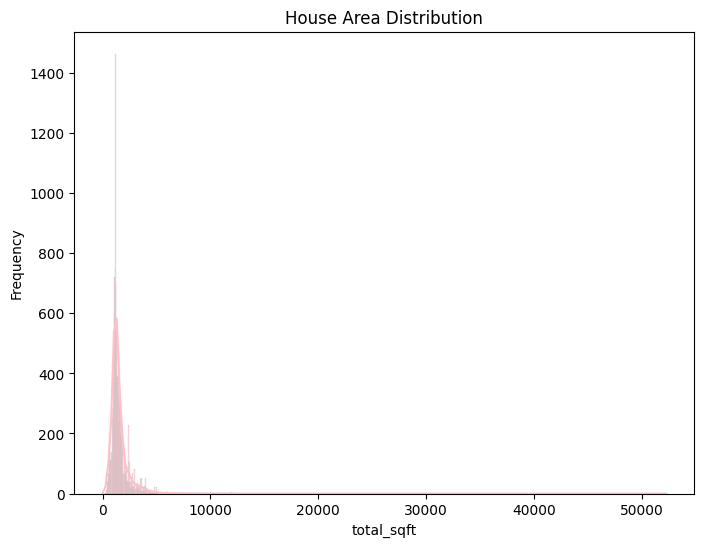

In [ ]:
plot_distribution("total_sqft",'House Area Distribution')

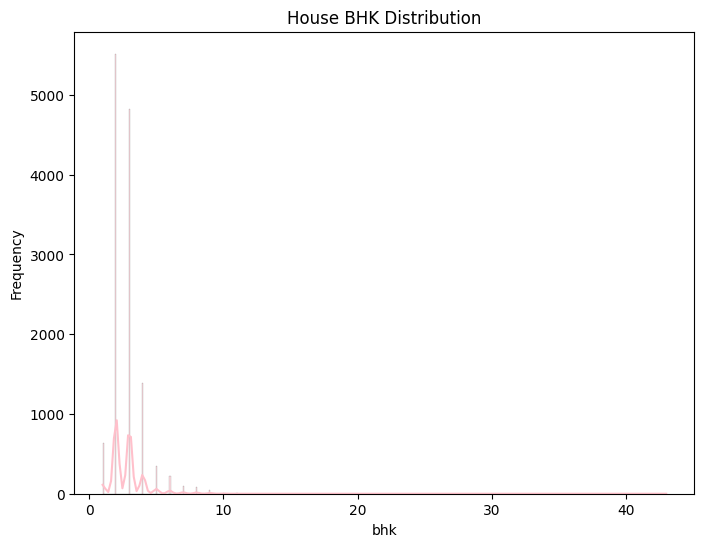

In [ ]:
plot_distribution("bhk",'House BHK Distribution')


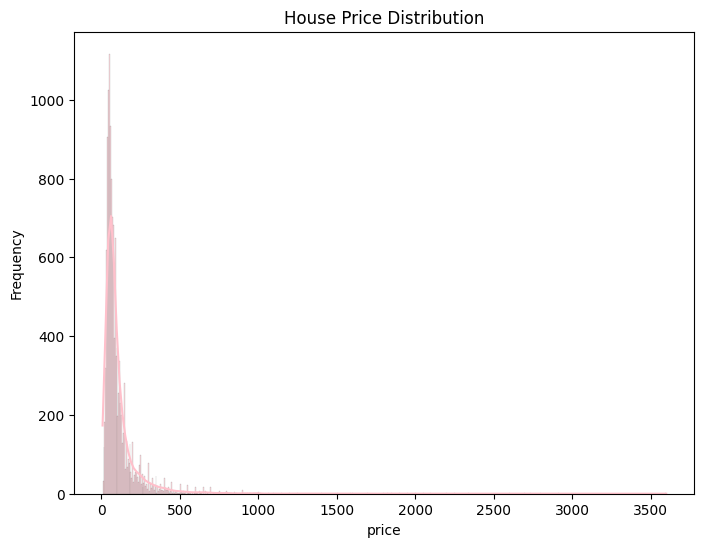

In [ ]:
plot_distribution("price",'House Price Distribution')

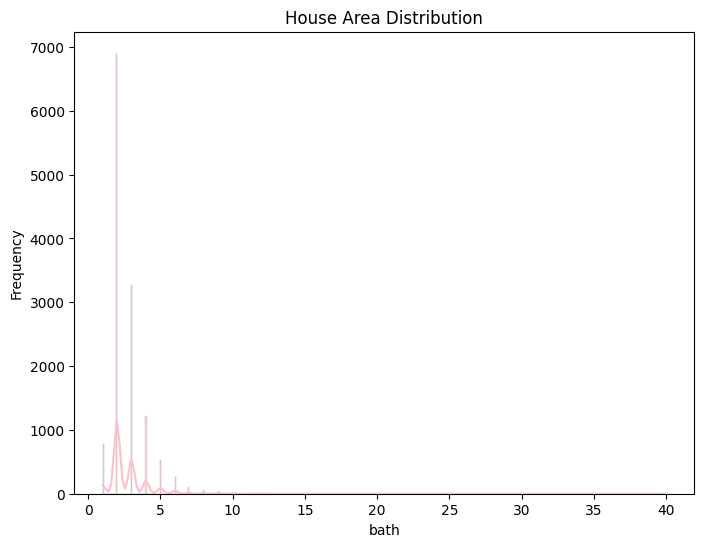

In [ ]:
plot_distribution("bath",'House Area Distribution')

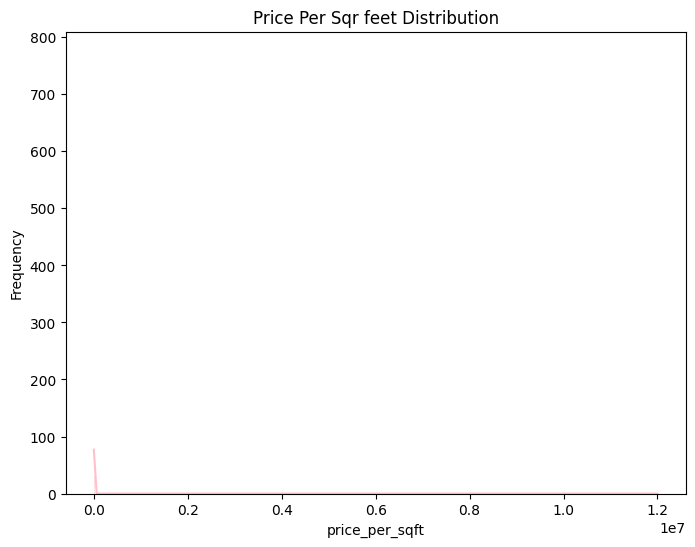

In [ ]:
plot_distribution('price_per_sqft','Price Per Sqr feet Distribution')

OUTLIERS HANDLING

### MEAN & STD DEVIATION METHOD


In [ ]:
def MS_trimming(column):
  upperlimit=house_price[column].mean()+3*house_price[column].std()
  lowerlimit=house_price[column].mean()-3*house_price[column].std()
  print('In',column ,'column')
  print('upper limit=',upperlimit)
  print('lower limit=',lowerlimit)
  outliers=house_price.loc[(house_price[column]>upperlimit) | (house_price[column]<lowerlimit)]
  print('OUTLIERS IN',column,'COLUMNS ARE DISPLAYED HERE')
  print(outliers[column].T)
  print('TRIMMING')
  house_price_new = house_price.loc[(house_price[column]<upperlimit) & (house_price[column]>lowerlimit)]
  print('old data :', len(house_price),'rows')
  print('new data :', len(house_price_new),'rows')
  print('no.of.outliers:',len(house_price)-len(house_price_new))
  sns.boxplot(house_price_new[column])







In [ ]:
def MS_capping(column):
  upperlimit=house_price[column].mean()+3*house_price[column].std()
  lowerlimit=house_price[column].mean()-3*house_price[column].std()
  print('In',column ,'column')
  print('upper limit=',upperlimit)
  print('lower limit=',lowerlimit)
  outliers=house_price.loc[(house_price[column]>upperlimit) | (house_price[column]<lowerlimit)]
  print('OUTLIERS IN',column,'COLUMNS ARE DISPLAYED HERE')
  print(outliers[column].T)
  print('CAPPING')
  cap_data=house_price.copy()
  cap_data.loc[(cap_data[column]>upperlimit),column]=upperlimit
  cap_data.loc[(cap_data[column]<lowerlimit),column]=lowerlimit
  data_length =len(cap_data)
  print('data length :',data_length)
  sns.boxplot(cap_data[column])


In [ ]:
def MS_imput(column):
  upperlimit=house_price[column].mean()+3*house_price[column].std()
  lowerlimit=house_price[column].mean()-3*house_price[column].std()
  print('In',column ,'column')
  print('upper limit=',upperlimit)
  print('lower limit=',lowerlimit)
  outliers=house_price.loc[(house_price[column]>upperlimit) | (house_price[column]<lowerlimit)]
  print('OUTLIERS IN',column,'COLUMNS ARE DISPLAYED HERE')
  print(outliers[column].T)
  print('IMPUTATION')
  imput_data=house_price.copy()
  imput_data.loc[(imput_data[column]>upperlimit),column]=imput_data[column].mean()
  imput_data.loc[(imput_data[column]<lowerlimit),column]=imput_data[column].mean()
  data_length =len(imput_data)
  print('data length :',data_length)
  sns.boxplot(imput_data[column])

In bath column
upper limit= 6.70788162409022
lower limit= -1.3256088968174926
OUTLIERS IN bath COLUMNS ARE DISPLAYED HERE
45       9.0
63       8.0
67       7.0
83       7.0
127      7.0
        ... 
13100    9.0
13102    9.0
13107    8.0
13157    7.0
13191    9.0
Name: bath, Length: 240, dtype: float64
TRIMMING
old data : 13200 rows
new data : 12960 rows
no.of.outliers: 240


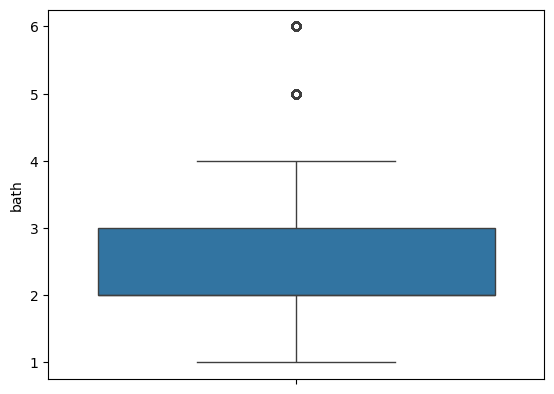

In [ ]:
MS_trimming('bath')


In bath column
upper limit= 6.70788162409022
lower limit= -1.3256088968174926
OUTLIERS IN bath COLUMNS ARE DISPLAYED HERE
45       9.0
63       8.0
67       7.0
83       7.0
127      7.0
        ... 
13100    9.0
13102    9.0
13107    8.0
13157    7.0
13191    9.0
Name: bath, Length: 240, dtype: float64
CAPPING
data length : 13200


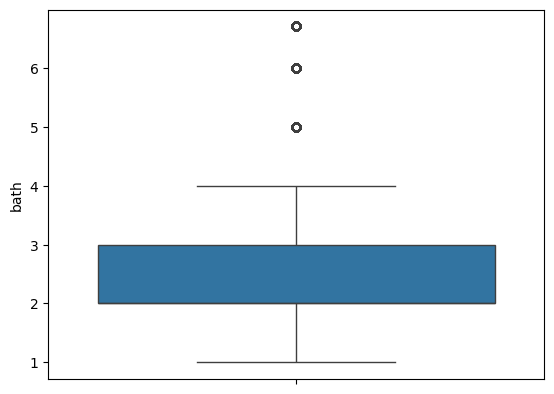

In [ ]:
MS_capping('bath')

In bath column
upper limit= 6.70788162409022
lower limit= -1.3256088968174926
OUTLIERS IN bath COLUMNS ARE DISPLAYED HERE
45       9.0
63       8.0
67       7.0
83       7.0
127      7.0
        ... 
13100    9.0
13102    9.0
13107    8.0
13157    7.0
13191    9.0
Name: bath, Length: 240, dtype: float64
IMPUTATION
data length : 13200


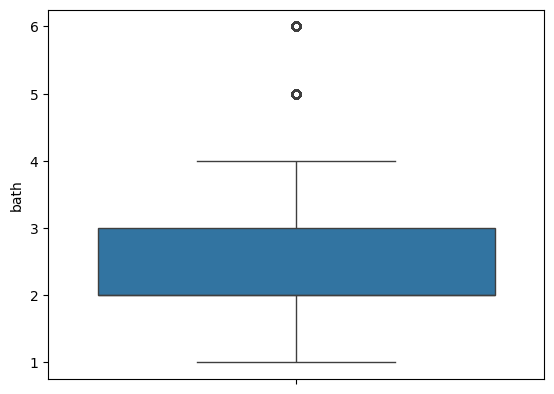

In [ ]:
MS_imput('bath')

In above 3 figures, trimming and imputation method got 2 outliers and capping method got 3 for column 'bath'.

In total_sqft column
upper limit= 5267.273119159089
lower limit= -2156.6675532499985
OUTLIERS IN total_sqft COLUMNS ARE DISPLAYED HERE
61        5700.0
120       5611.5
404      12000.0
435      11890.0
509       8500.0
          ...   
12976     6652.0
13000     6688.0
13078     9200.0
13081     8000.0
13107     6000.0
Name: total_sqft, Length: 117, dtype: float64
TRIMMING
old data : 13200 rows
new data : 13083 rows
no.of.outliers: 117


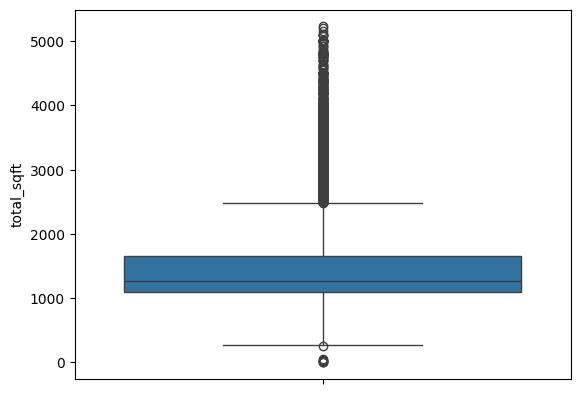

In [ ]:
MS_trimming('total_sqft')

In total_sqft column
upper limit= 5267.273119159089
lower limit= -2156.6675532499985
OUTLIERS IN total_sqft COLUMNS ARE DISPLAYED HERE
61        5700.0
120       5611.5
404      12000.0
435      11890.0
509       8500.0
          ...   
12976     6652.0
13000     6688.0
13078     9200.0
13081     8000.0
13107     6000.0
Name: total_sqft, Length: 117, dtype: float64
CAPPING
data length : 13200


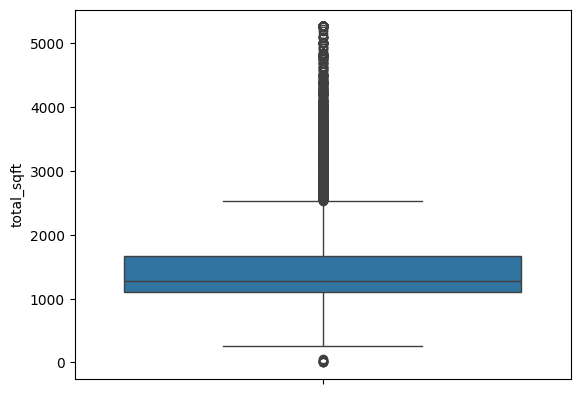

In [ ]:
MS_capping('total_sqft')

In total_sqft column
upper limit= 5267.273119159089
lower limit= -2156.6675532499985
OUTLIERS IN total_sqft COLUMNS ARE DISPLAYED HERE
61        5700.0
120       5611.5
404      12000.0
435      11890.0
509       8500.0
          ...   
12976     6652.0
13000     6688.0
13078     9200.0
13081     8000.0
13107     6000.0
Name: total_sqft, Length: 117, dtype: float64
IMPUTATION
data length : 13200


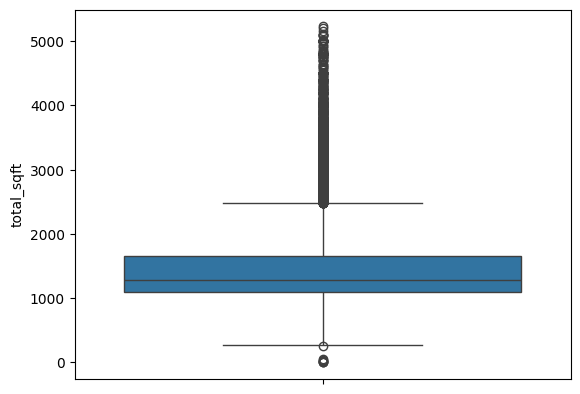

In [ ]:
MS_imput('total_sqft')

In price column
upper limit= 559.8041631858042
lower limit= -335.25180788277396
OUTLIERS IN price COLUMNS ARE DISPLAYED HERE
7         600.0
61        650.0
157       760.0
404      2200.0
435       700.0
          ...  
12967     988.0
12976     660.0
13000     700.0
13078    2600.0
13081    2800.0
Name: price, Length: 192, dtype: float64
TRIMMING
old data : 13200 rows
new data : 13008 rows
no.of.outliers: 192


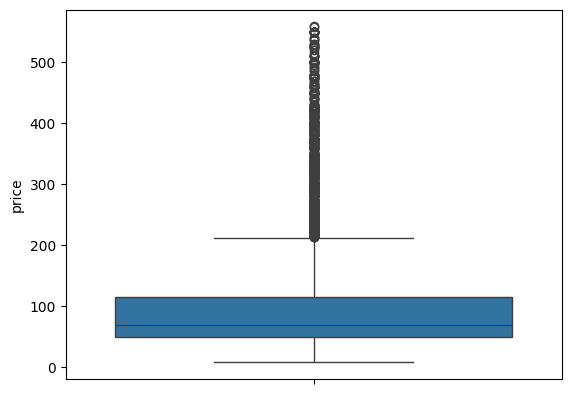

In [ ]:
MS_trimming('price')

In price column
upper limit= 559.8041631858042
lower limit= -335.25180788277396
OUTLIERS IN price COLUMNS ARE DISPLAYED HERE
7         600.0
61        650.0
157       760.0
404      2200.0
435       700.0
          ...  
12967     988.0
12976     660.0
13000     700.0
13078    2600.0
13081    2800.0
Name: price, Length: 192, dtype: float64
CAPPING
data length : 13200


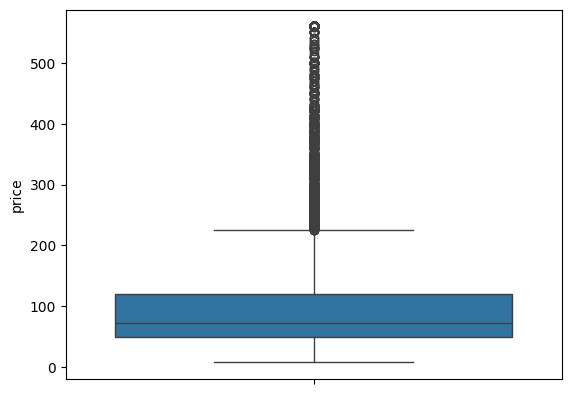

In [ ]:
MS_capping('price')

In price column
upper limit= 559.8041631858042
lower limit= -335.25180788277396
OUTLIERS IN price COLUMNS ARE DISPLAYED HERE
7         600.0
61        650.0
157       760.0
404      2200.0
435       700.0
          ...  
12967     988.0
12976     660.0
13000     700.0
13078    2600.0
13081    2800.0
Name: price, Length: 192, dtype: float64
IMPUTATION
data length : 13200


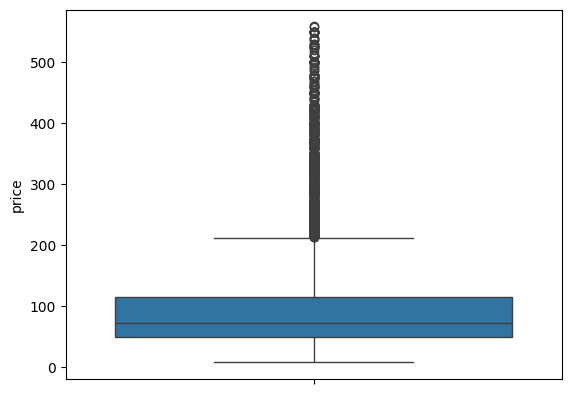

In [ ]:
MS_imput('price')

In price_per_sqft column
upper limit= 328101.8177267502
lower limit= -312261.14424190175
OUTLIERS IN price_per_sqft COLUMNS ARE DISPLAYED HERE
345        672727
1106       625000
4044     12000000
4924      2300000
11447      363333
Name: price_per_sqft, dtype: int64
TRIMMING
old data : 13200 rows
new data : 13195 rows
no.of.outliers: 5


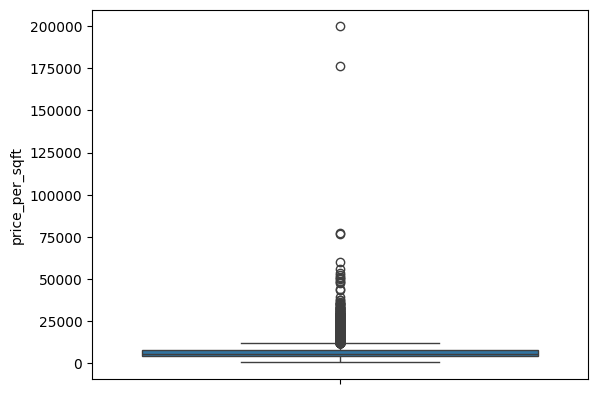

In [ ]:
MS_trimming('price_per_sqft')

In price_per_sqft column
upper limit= 328101.8177267502
lower limit= -312261.14424190175
OUTLIERS IN price_per_sqft COLUMNS ARE DISPLAYED HERE
345        672727
1106       625000
4044     12000000
4924      2300000
11447      363333
Name: price_per_sqft, dtype: int64
CAPPING
data length : 13200


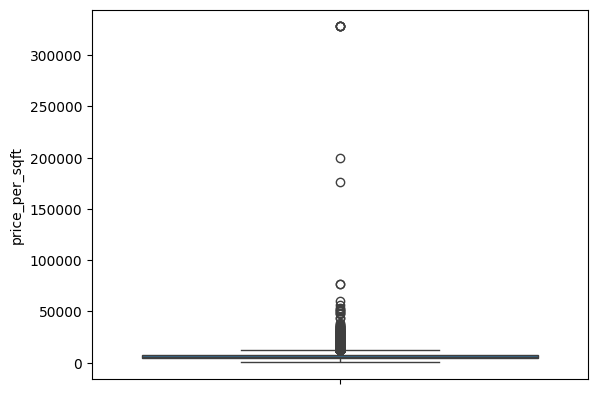

In [ ]:
MS_capping('price_per_sqft')

In price_per_sqft column
upper limit= 328101.8177267502
lower limit= -312261.14424190175
OUTLIERS IN price_per_sqft COLUMNS ARE DISPLAYED HERE
345        672727
1106       625000
4044     12000000
4924      2300000
11447      363333
Name: price_per_sqft, dtype: int64
IMPUTATION
data length : 13200


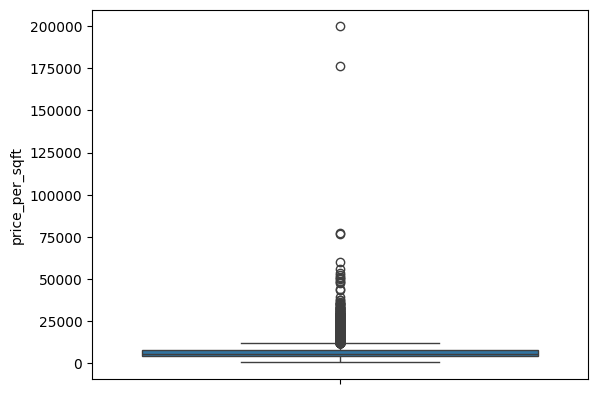

In [ ]:
MS_imput('price_per_sqft')

In bhk column
upper limit= 6.679363597150935
lower limit= -1.0776969304842692
OUTLIERS IN bhk COLUMNS ARE DISPLAYED HERE
45       8
63       8
67       8
127      7
138      8
        ..
13100    7
13102    9
13107    8
13157    7
13191    7
Name: bhk, Length: 266, dtype: int64
TRIMMING
old data : 13200 rows
new data : 12934 rows
no.of.outliers: 266


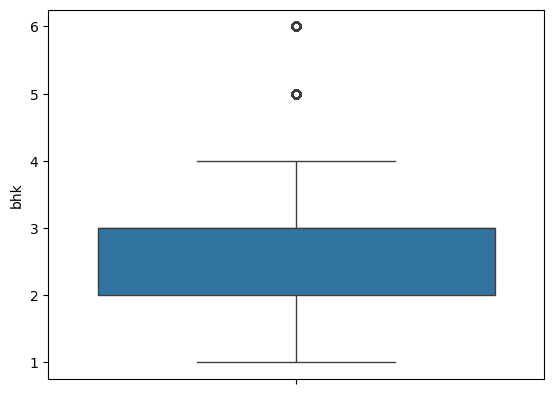

In [ ]:
MS_trimming('bhk')

In bhk column
upper limit= 6.679363597150935
lower limit= -1.0776969304842692
OUTLIERS IN bhk COLUMNS ARE DISPLAYED HERE
45       8
63       8
67       8
127      7
138      8
        ..
13100    7
13102    9
13107    8
13157    7
13191    7
Name: bhk, Length: 266, dtype: int64
CAPPING
data length : 13200


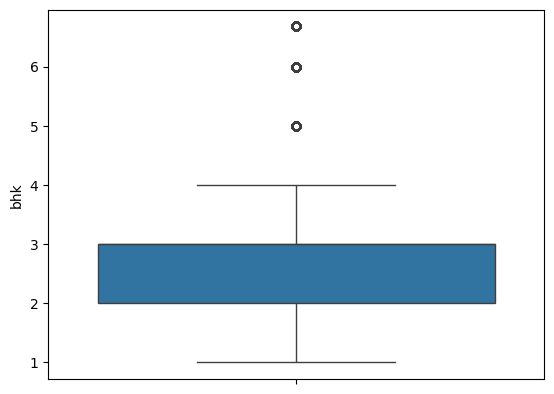

In [ ]:
MS_capping('bhk')

In bhk column
upper limit= 6.679363597150935
lower limit= -1.0776969304842692
OUTLIERS IN bhk COLUMNS ARE DISPLAYED HERE
45       8
63       8
67       8
127      7
138      8
        ..
13100    7
13102    9
13107    8
13157    7
13191    7
Name: bhk, Length: 266, dtype: int64
IMPUTATION
data length : 13200


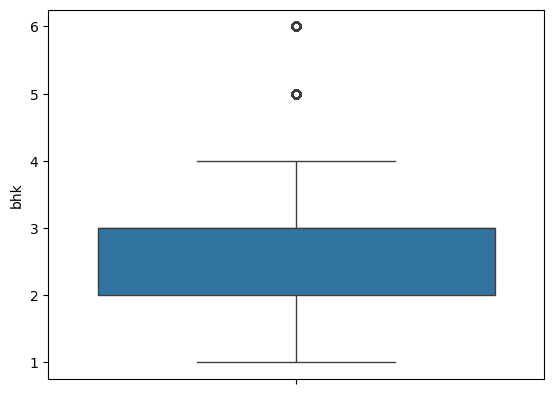

In [ ]:
MS_imput('bhk')

### INTER QUARTILE RANGE METHOD

In [ ]:
q1_bath = house_price['bath'].quantile(0.25)
q3_bath = house_price['bath'].quantile(0.75)
iqr_bath = q3-q1

In [ ]:
q1_bath,iqr_bath,q3_bath

(2.0, 1.0, 3.0)

In [ ]:
ul_bath=q3_bath+(1.5*iqr_bath)
ll_bath=q1_bath-(1.5*iqr_bath)
ul_bath ,ll_bath

(4.5, 0.5)

TRIMMING
old data : 13200 rows
new data : 12170 rows
no.of.outliers: 1030


<Axes: ylabel='bath'>

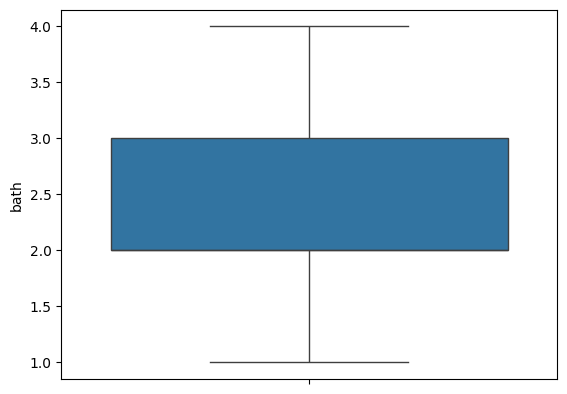

In [ ]:
print('TRIMMING')
house_price_new = house_price.loc[(house_price['bath']<ul_bath) & (house_price['bath']>ll_bath)]
print('old data :', len(house_price),'rows')
print('new data :', len(house_price_new),'rows')
print('no.of.outliers:',len(house_price)-len(house_price_new))
sns.boxplot(house_price_new['bath'])




CAPPING
data length : 13200


<Axes: ylabel='bath'>

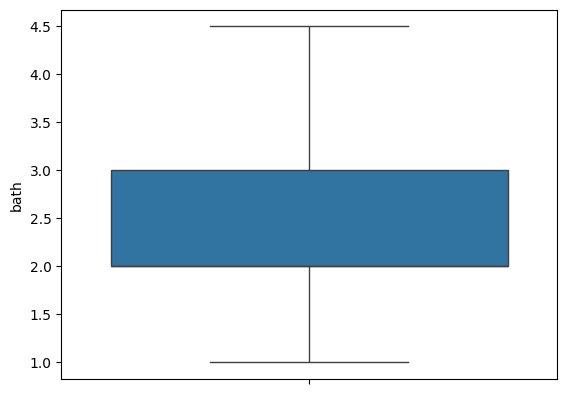

In [ ]:
print('CAPPING')
cap_data=house_price.copy()
cap_data.loc[(cap_data['bath']>ul_bath),'bath']=ul_bath
cap_data.loc[(cap_data['bath']<ll_bath),'bath']=ll_bath
data_length =len(cap_data)
print('data length :',data_length)
sns.boxplot(cap_data['bath'])


IMPUTATION
data length : 13200


<Axes: ylabel='bath'>

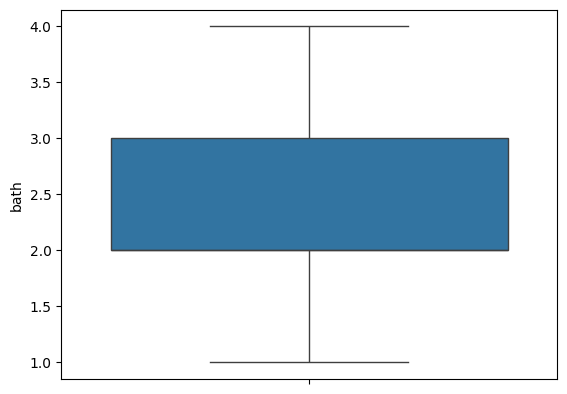

In [ ]:
print('IMPUTATION')
imput_data=house_price.copy()
imput_data.loc[(imput_data['bath']>ul_bath),'bath']=imput_data['bath'].mean()
imput_data.loc[(imput_data['bath']<ll_bath),'bath']=imput_data['bath'].mean()
data_length =len(imput_data)
print('data length :',data_length)
sns.boxplot(imput_data['bath'])

In [ ]:
def iqr_trim(column):
  q1= house_price[column].quantile(0.25)
  q3 = house_price[column].quantile(0.75)
  iqr = q3-q1
  print('q1,iqr,q3 :',q1,iqr,q3)
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  print('upper limit,lower limit',ul,ll)
  print('TRIMMING')
  house_price_new = house_price.loc[(house_price[column]<ul) & (house_price[column]>ll)]
  print('old data :', len(house_price),'rows')
  print('new data :', len(house_price_new),'rows')
  print('no.of.outliers:',len(house_price)-len(house_price_new))
  sns.boxplot(house_price_new[column])






In [ ]:
def iqr_cap(column):
  q1= house_price[column].quantile(0.25)
  q3 = house_price[column].quantile(0.75)
  iqr = q3-q1
  print('q1,iqr,q3 :',q1,iqr,q3)
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  print('upper limit,lower limit',ul,ll)
  print('CAPPING')
  cap_data=house_price.copy()
  cap_data.loc[(cap_data[column]>ul),column]=ul
  cap_data.loc[(cap_data[column]<ll),column]=ll
  data_length =len(cap_data)
  print('data length :',data_length)
  sns.boxplot(cap_data[column])





In [ ]:
def iqr_imput(column):
  q1= house_price[column].quantile(0.25)
  q3 = house_price[column].quantile(0.75)
  iqr = q3-q1
  print('q1,iqr,q3 :',q1,iqr,q3)
  ul=q3+(1.5*iqr)
  ll=q1-(1.5*iqr)
  print('upper limit,lower limit',ul,ll)
  print('IMPUTATION')
  imput_data=house_price.copy()
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()
  imput_data.loc[(imput_data[column]<ll),column]=imput_data[column].mean()
  data_length =len(imput_data)
  print('data length :',data_length)
  sns.boxplot(imput_data[column])

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
TRIMMING
old data : 13200 rows
new data : 12170 rows
no.of.outliers: 1030


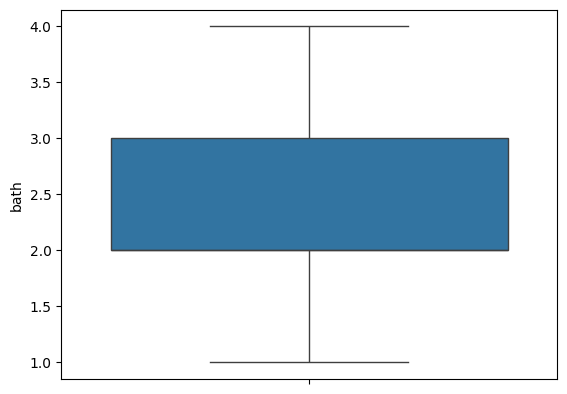

In [ ]:
iqr_trim('bath')

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
CAPPING
data length : 13200


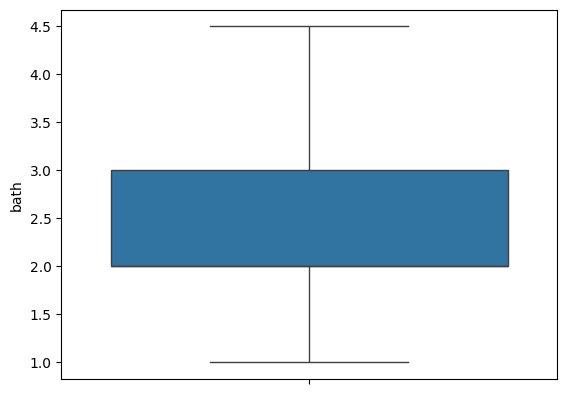

In [ ]:
iqr_cap('bath')

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
IMPUTATION
data length : 13200


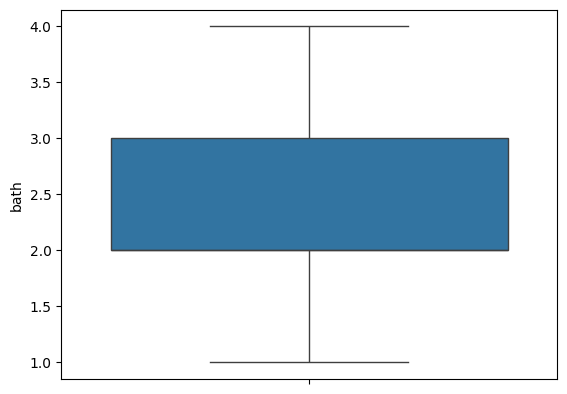

In [ ]:
iqr_imput('bath')

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
TRIMMING
old data : 13200 rows
new data : 12365 rows
no.of.outliers: 835


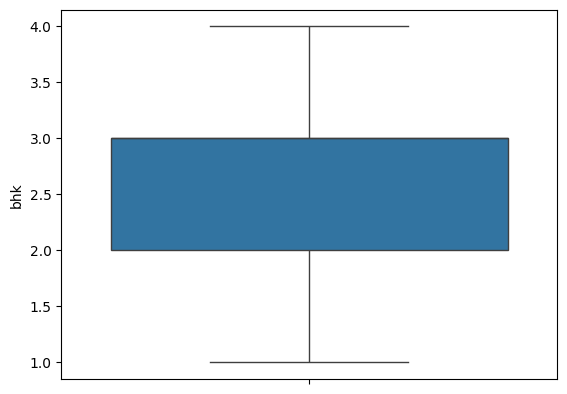

In [ ]:
iqr_trim('bhk')

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
CAPPING
data length : 13200


<ipython-input-41-584e8adc75c8>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cap_data.loc[(cap_data[column]>ul),column]=ul


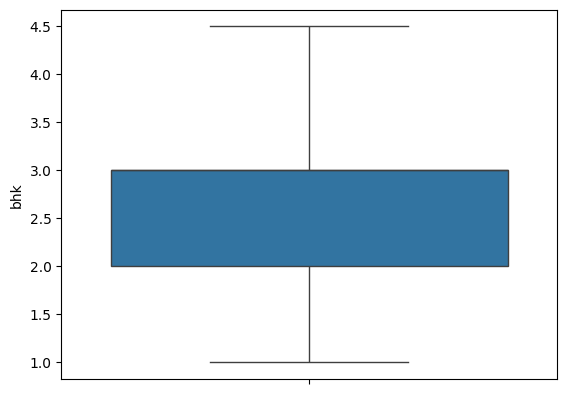

In [ ]:
iqr_cap('bhk')

q1,iqr,q3 : 2.0 1.0 3.0
upper limit,lower limit 4.5 0.5
IMPUTATION
data length : 13200


<ipython-input-48-a92dbc4ec821>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.8008333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()


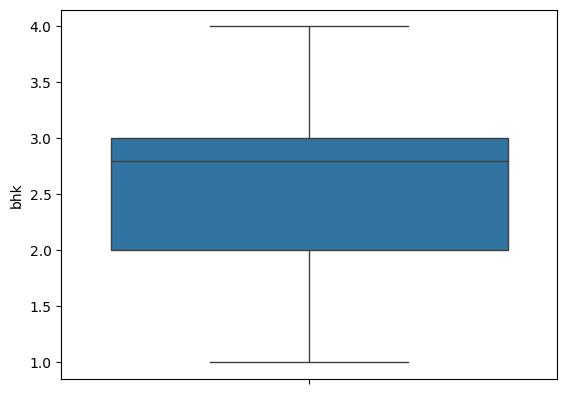

In [ ]:
iqr_imput('bhk')

q1,iqr,q3 : 50.0 70.0 120.0
upper limit,lower limit 225.0 -55.0
TRIMMING
old data : 13200 rows
new data : 11908 rows
no.of.outliers: 1292


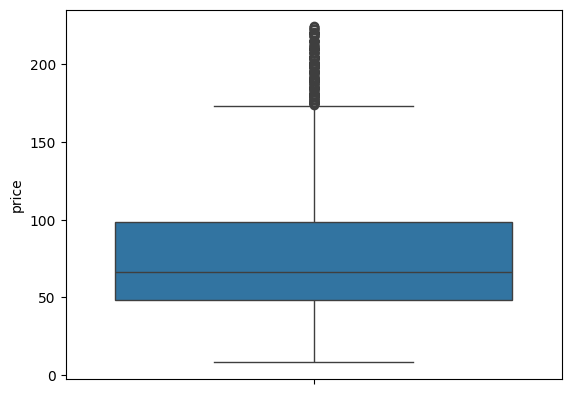

In [ ]:
iqr_trim('price')

q1,iqr,q3 : 50.0 70.0 120.0
upper limit,lower limit 225.0 -55.0
CAPPING
data length : 13200


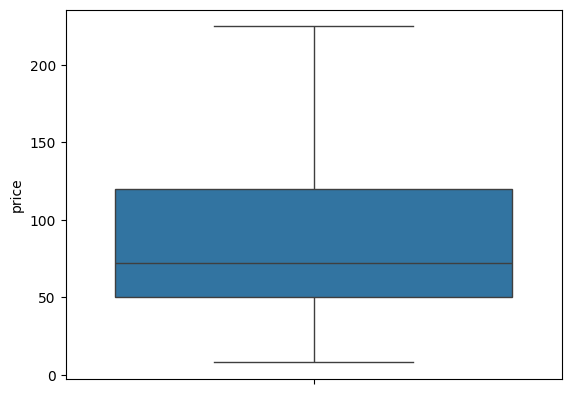

In [ ]:
iqr_cap('price')

q1,iqr,q3 : 50.0 70.0 120.0
upper limit,lower limit 225.0 -55.0
IMPUTATION
data length : 13200


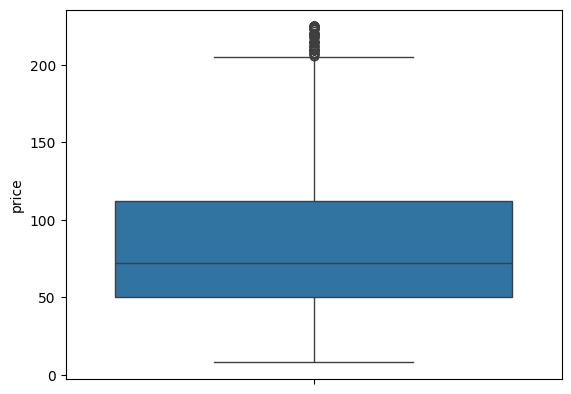

In [ ]:
iqr_imput('price')

q1,iqr,q3 : 4267.0 3050.0 7317.0
upper limit,lower limit 11892.0 -308.0
TRIMMING
old data : 13200 rows
new data : 11935 rows
no.of.outliers: 1265


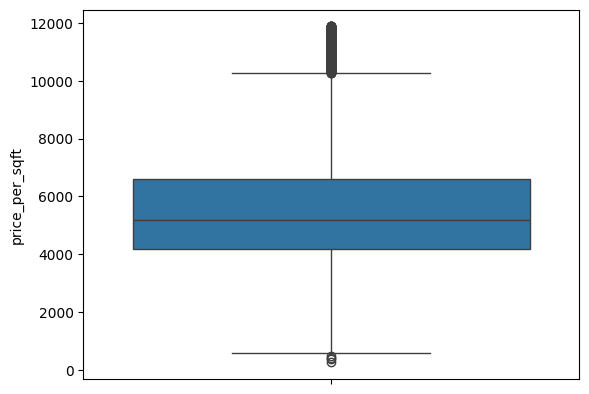

In [ ]:
iqr_trim('price_per_sqft')

q1,iqr,q3 : 4267.0 3050.0 7317.0
upper limit,lower limit 11892.0 -308.0
CAPPING
data length : 13200


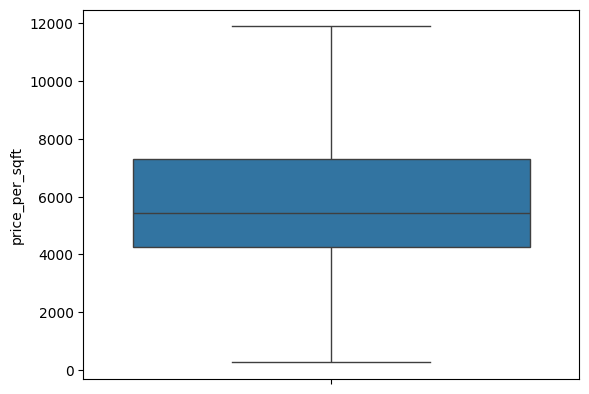

In [ ]:
iqr_cap('price_per_sqft')

q1,iqr,q3 : 4267.0 3050.0 7317.0
upper limit,lower limit 11892.0 -308.0
IMPUTATION
data length : 13200


<ipython-input-48-a92dbc4ec821>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7920.336742424242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()


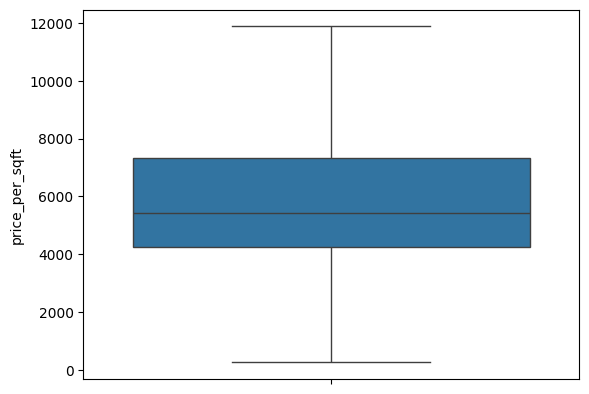

In [ ]:
iqr_imput('price_per_sqft')

q1,iqr,q3 : 1100.0 572.0 1672.0
upper limit,lower limit 2530.0 242.0
TRIMMING
old data : 13200 rows
new data : 12051 rows
no.of.outliers: 1149


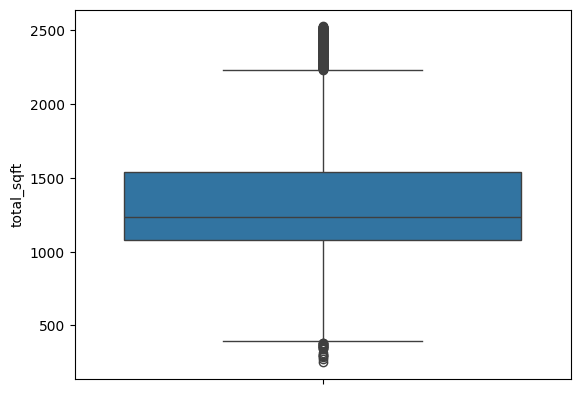

In [ ]:
iqr_trim('total_sqft')

q1,iqr,q3 : 1100.0 572.0 1672.0
upper limit,lower limit 2530.0 242.0
CAPPING
data length : 13200


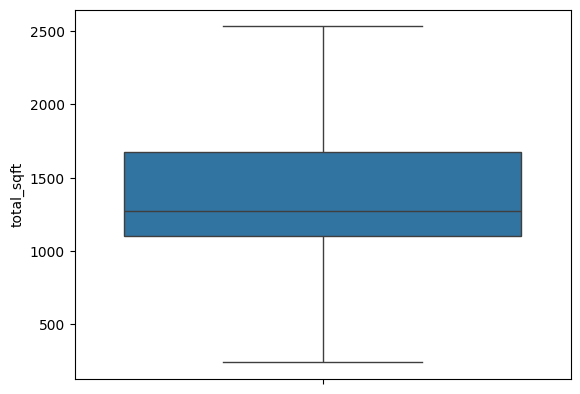

In [ ]:
iqr_cap('total_sqft')

q1,iqr,q3 : 1100.0 572.0 1672.0
upper limit,lower limit 2530.0 242.0
IMPUTATION
data length : 13200


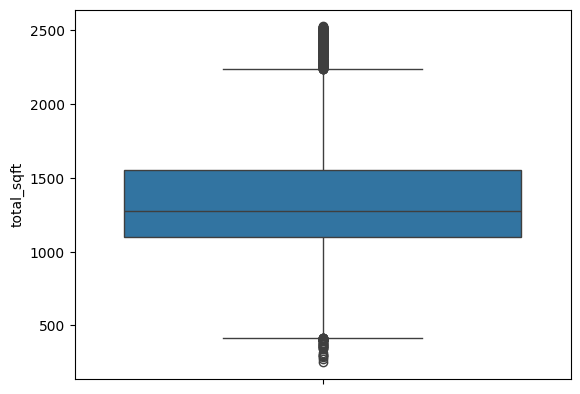

In [ ]:
iqr_imput('total_sqft')

### PERCENTILE METHOD

In [6]:
def per_trim(column):
  ul = house_price[column].quantile(0.95)
  ll = house_price[column].quantile(0.05)
  print('upper limit, lower limit :',ul,ll)
  print('TRIMMING')
  house_price_new = house_price.loc[(house_price[column]<ul) & (house_price[column]>ll)]
  print('old data :', len(house_price),'rows')
  print('new data :', len(house_price_new),'rows')
  print('no.of.outliers:',len(house_price)-len(house_price_new))
  sns.boxplot(house_price_new[column])





In [8]:
def per_cap(column):
  ul = house_price[column].quantile(0.95)
  ll = house_price[column].quantile(0.05)
  print('upper limit, lower limit :',ul,ll)
  print('CAPPING')
  cap_data=house_price.copy()
  cap_data.loc[(cap_data[column]>ul),column]=ul
  cap_data.loc[(cap_data[column]<ll),column]=ll
  data_length =len(cap_data)
  print('data length :',data_length)
  sns.boxplot(cap_data[column])





In [ ]:
def per_imput(column):
  ul = house_price[column].quantile(0.95)
  ll = house_price[column].quantile(0.05)
  print('upper limit, lower limit :',ul,ll)
  print('IMPUTATION')
  imput_data=house_price.copy()
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()
  imput_data.loc[(imput_data[column]<ll),column]=imput_data[column].mean()
  data_length =len(imput_data)
  print('data length :',data_length)
  sns.boxplot(imput_data[column])

upper limit, lower limit : 5.0 1.0
TRIMMING
old data : 13200 rows
new data : 11389 rows
no.of.outliers: 1811


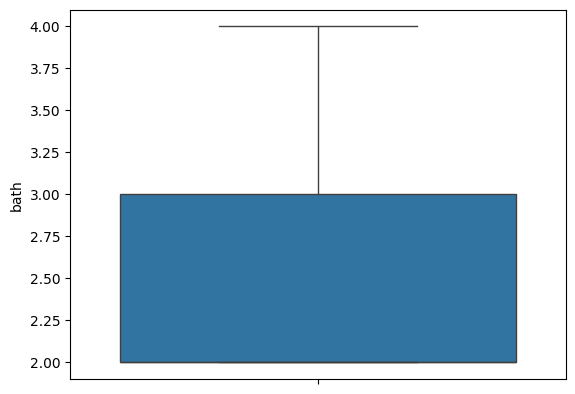

In [7]:
per_trim("bath")

upper limit, lower limit : 5.0 1.0
CAPPING
data length : 13200


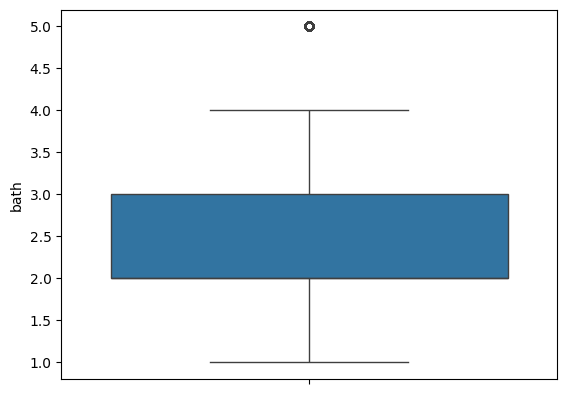

In [9]:
per_cap("bath")

upper limit, lower limit : 5.0 1.0
IMPUTATION
data length : 13200


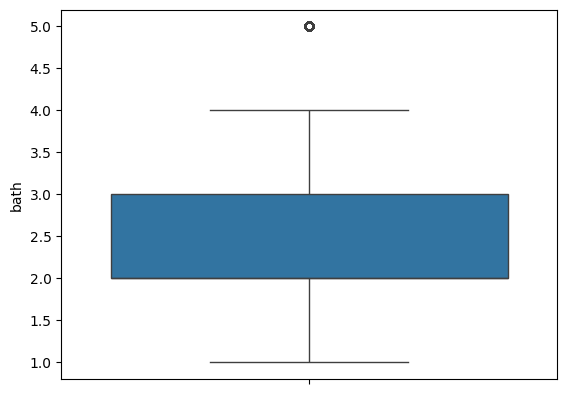

In [ ]:
per_imput("bath")

upper limit, lower limit : 5.0 2.0
TRIMMING
old data : 13200 rows
new data : 6208 rows
no.of.outliers: 6992


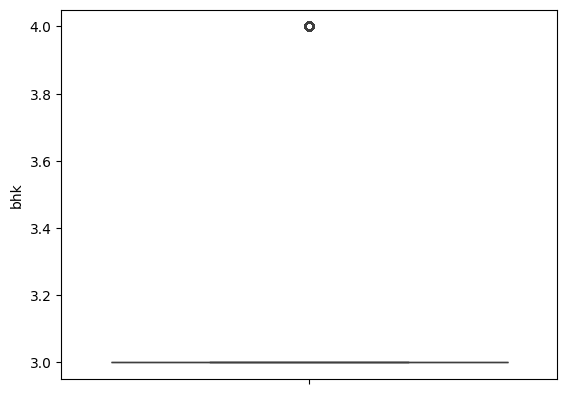

In [ ]:
per_trim("bhk")

upper limit, lower limit : 5.0 2.0
CAPPING
data length : 13200


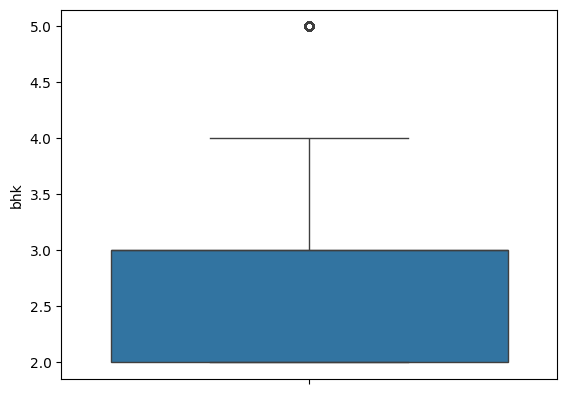

In [ ]:
per_cap("bhk")

upper limit, lower limit : 5.0 2.0
IMPUTATION
data length : 13200


<ipython-input-59-6c3d4dada954>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.8008333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()


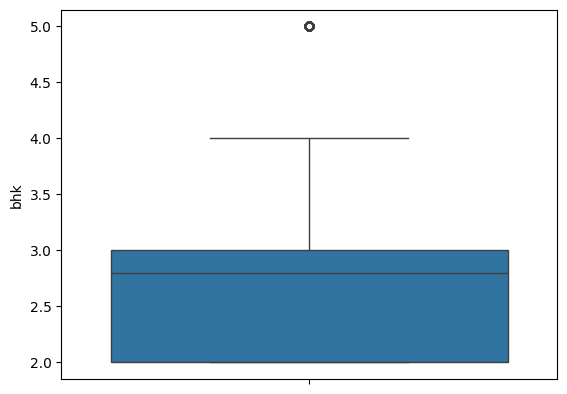

In [ ]:
per_imput("bhk")

upper limit, lower limit : 320.0 31.99
TRIMMING
old data : 13200 rows
new data : 11874 rows
no.of.outliers: 1326


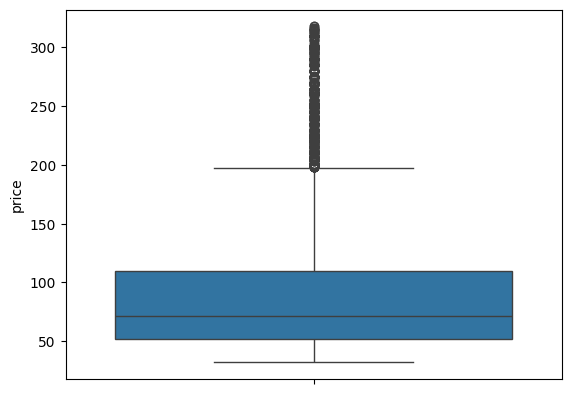

In [ ]:
per_trim("price")

upper limit, lower limit : 320.0 31.99
CAPPING
data length : 13200


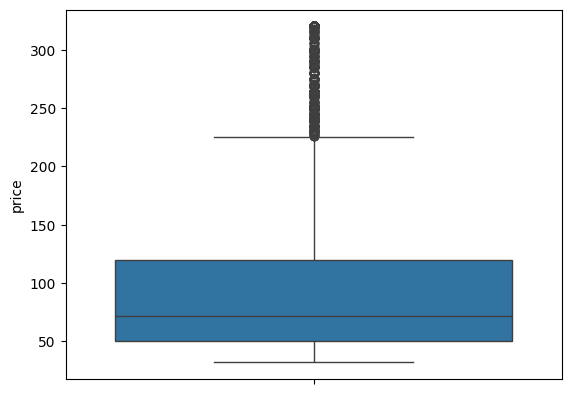

In [ ]:
per_cap("price")

upper limit, lower limit : 320.0 31.99
IMPUTATION
data length : 13200


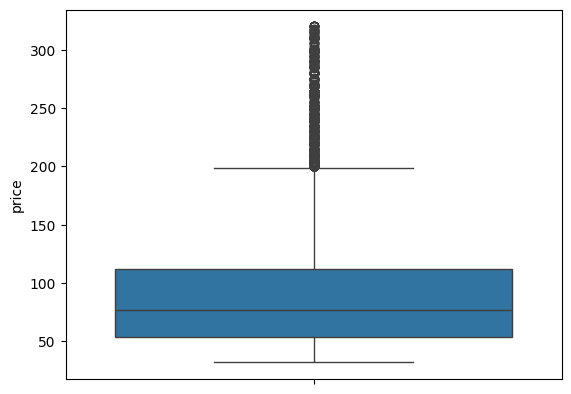

In [ ]:
per_imput("price")

upper limit, lower limit : 3216.549999999992 671.95
TRIMMING
old data : 13200 rows
new data : 11880 rows
no.of.outliers: 1320


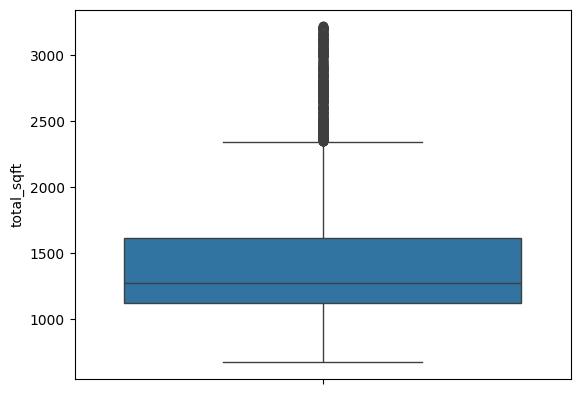

In [ ]:
per_trim("total_sqft")

upper limit, lower limit : 3216.549999999992 671.95
CAPPING
data length : 13200


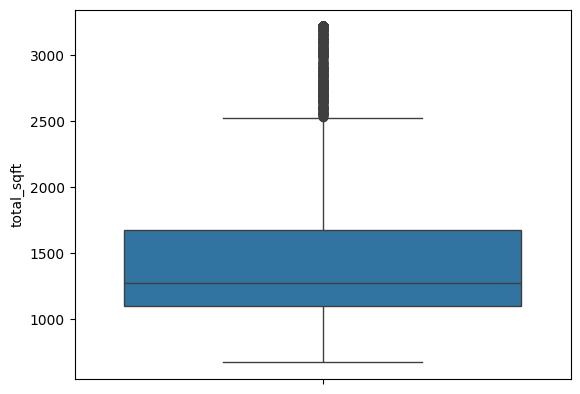

In [ ]:
per_cap("total_sqft")

upper limit, lower limit : 3216.549999999992 671.95
IMPUTATION
data length : 13200


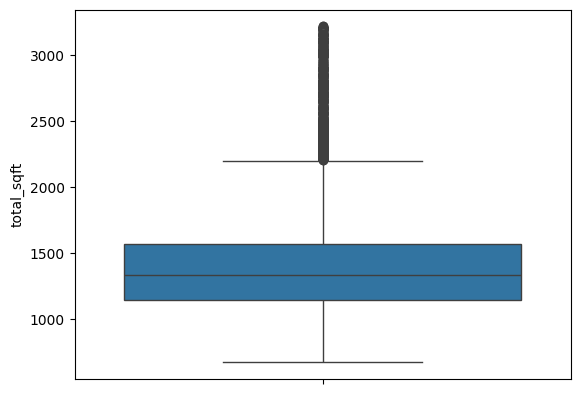

In [ ]:
per_imput("total_sqft")

upper limit, lower limit : 15312.099999999984 3107.8500000000004
TRIMMING
old data : 13200 rows
new data : 11880 rows
no.of.outliers: 1320


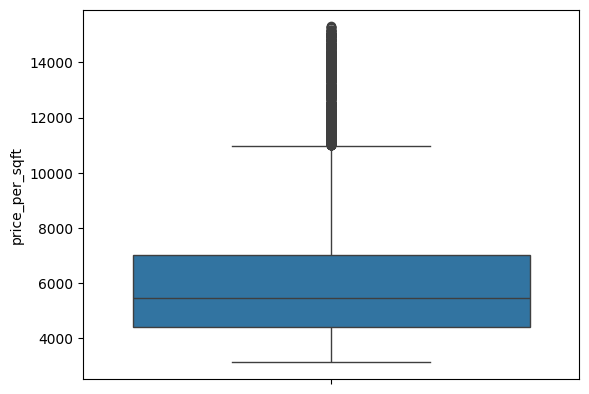

In [ ]:
per_trim("price_per_sqft")

upper limit, lower limit : 15312.099999999984 3107.8500000000004
CAPPING
data length : 13200


<ipython-input-60-23891b3bfde8>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cap_data.loc[(cap_data[column]>ul),column]=ul


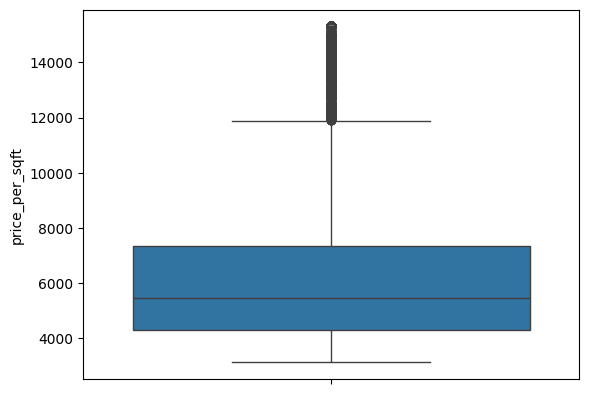

In [ ]:
per_cap("price_per_sqft")

upper limit, lower limit : 15312.099999999984 3107.8500000000004
IMPUTATION
data length : 13200


<ipython-input-59-6c3d4dada954>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7920.336742424242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imput_data.loc[(imput_data[column]>ul),column]=imput_data[column].mean()


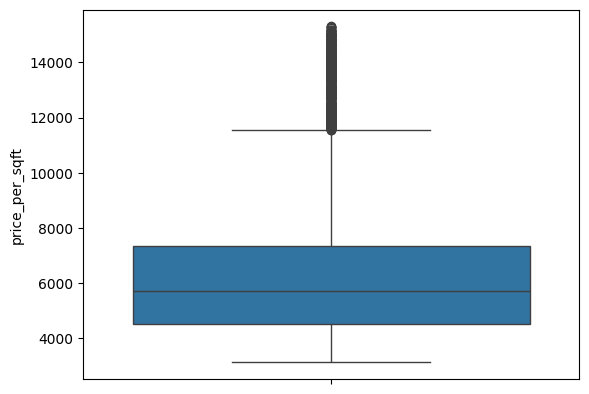

In [ ]:
per_imput("price_per_sqft")

### z score method

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.619436  
1      

<Axes: ylabel='bhk'>

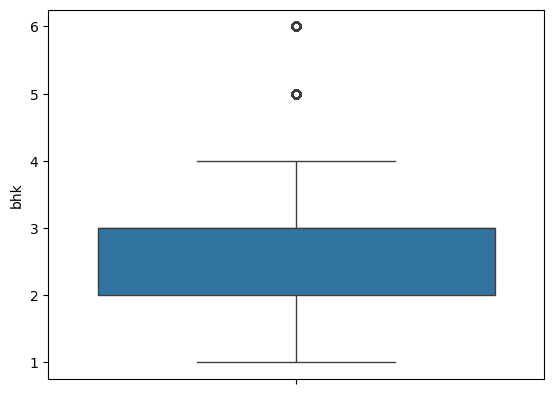

In [ ]:

  house_price["z_score"]=(house_price.bhk-house_price.bhk.mean())/house_price.bhk.std()
  house_price1=house_price[(house_price.z_score>-3) & (house_price.z_score<3)]
  print(house_price1)
  sns.boxplot(house_price1.bhk)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.516191  
1      

<Axes: ylabel='bath'>

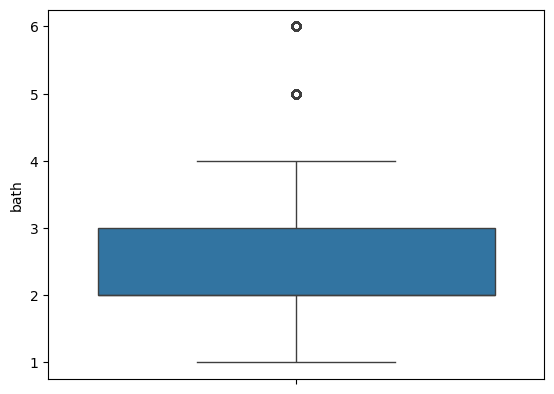

In [ ]:

  house_price["z_score"]=(house_price.bath-house_price.bath.mean())/house_price.bath.std()
  house_price2=house_price[(house_price.z_score>-3) & (house_price.z_score<3)]
  print(house_price2)
  sns.boxplot(house_price2.bath)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.490737  
1      

<Axes: ylabel='price'>

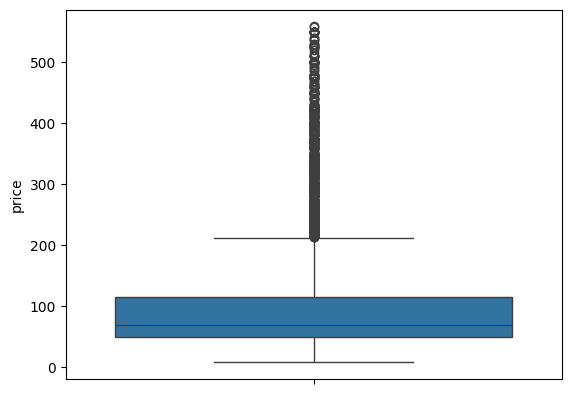

In [ ]:

  house_price["z_score"]=(house_price.price-house_price.price.mean())/house_price.price.std()
  house_price3=house_price[(house_price.z_score>-3) & (house_price.z_score<3)]
  print(house_price3)
  sns.boxplot(house_price3.price)





                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.039553  
1      

<Axes: ylabel='price_per_sqft'>

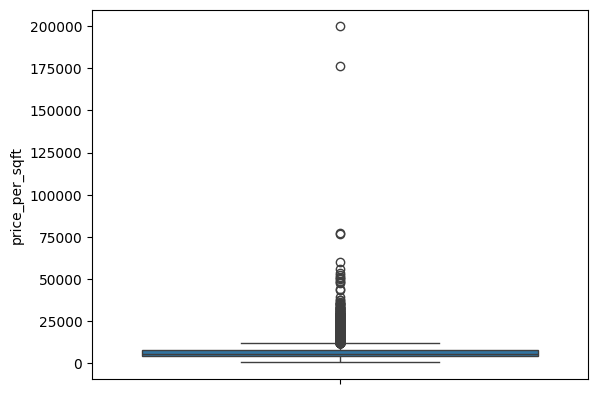

In [ ]:
house_price["z_score"]=(house_price.price_per_sqft-house_price.price_per_sqft.mean())/house_price.price_per_sqft.std()
house_price4=house_price[(house_price.z_score>-3) & (house_price.z_score<3)]
print(house_price4)
sns.boxplot(house_price4.price_per_sqft)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.403535  
1      

<Axes: ylabel='total_sqft'>

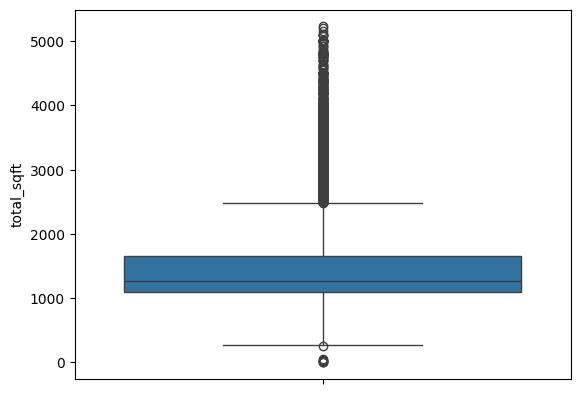

In [ ]:
house_price["z_score"]=(house_price.total_sqft-house_price.total_sqft.mean())/house_price.total_sqft.std()
house_price5=house_price[(house_price.z_score>-3) & (house_price.z_score<3)]
print(house_price5)
sns.boxplot(house_price5.total_sqft)

IQR method with capping is the best way to handle outliers in this data set.

### 4.Checking 'price per sqft' column is normal

In [ ]:
from scipy.stats import skew, kurtosis

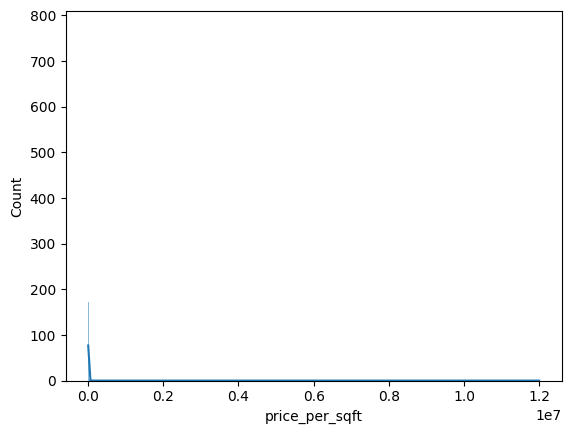

In [ ]:
sns.histplot(data=house_price,x="price_per_sqft",kde=True)
plt.show()

In [ ]:
house_price['price_per_sqft'].skew()

108.28105529705168

In [ ]:
house_price['price_per_sqft'].kurtosis()

12095.21502832288

12093.633538860382

In [ ]:
house_price['log_pps']=np.log(house_price["price_per_sqft"])
house_price['log_pps']

,log_pps
0,8.215818
1,8.437067
2,8.367532
3,8.739536
4,8.354674
...,...
13195,8.808220
13196,9.315691
13197,8.567506
13198,9.250234


In [ ]:
house_price['log_pps'].skew()

1.3998626551353

In [ ]:
house_price['log_pps'].kurtosis()

9.203576429862675

<Axes: xlabel='log_pps', ylabel='Count'>

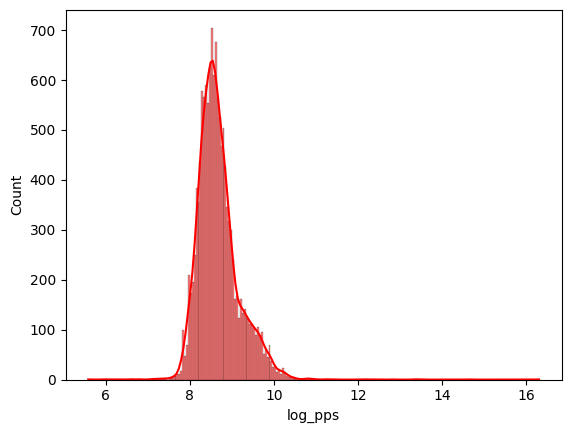

In [ ]:
sns.histplot(house_price['log_pps'],kde=True,color='r')

### 5.Correlation between all numerical columns

In [ ]:
house_price_num = house_price.drop(['location','size','z_score'],axis =1)
house_price_num

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689
13196,3600.0,5.0,400.00,4,11111
13197,1141.0,2.0,60.00,2,5258
13198,4689.0,4.0,488.00,4,10407


In [ ]:
corr1= house_price_num.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

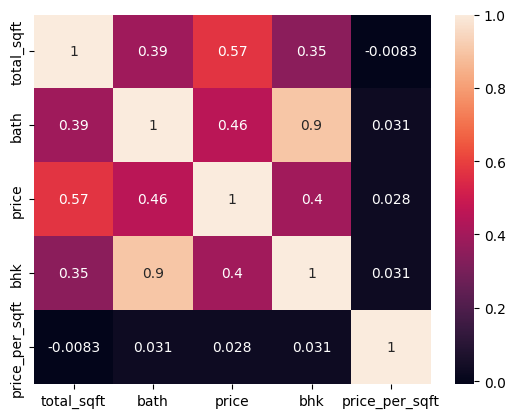

In [ ]:
sns.heatmap(corr1,annot=True)

### 6.Scatterplott between the variables to check the correlation between them

<Figure size 4000x4000 with 0 Axes>

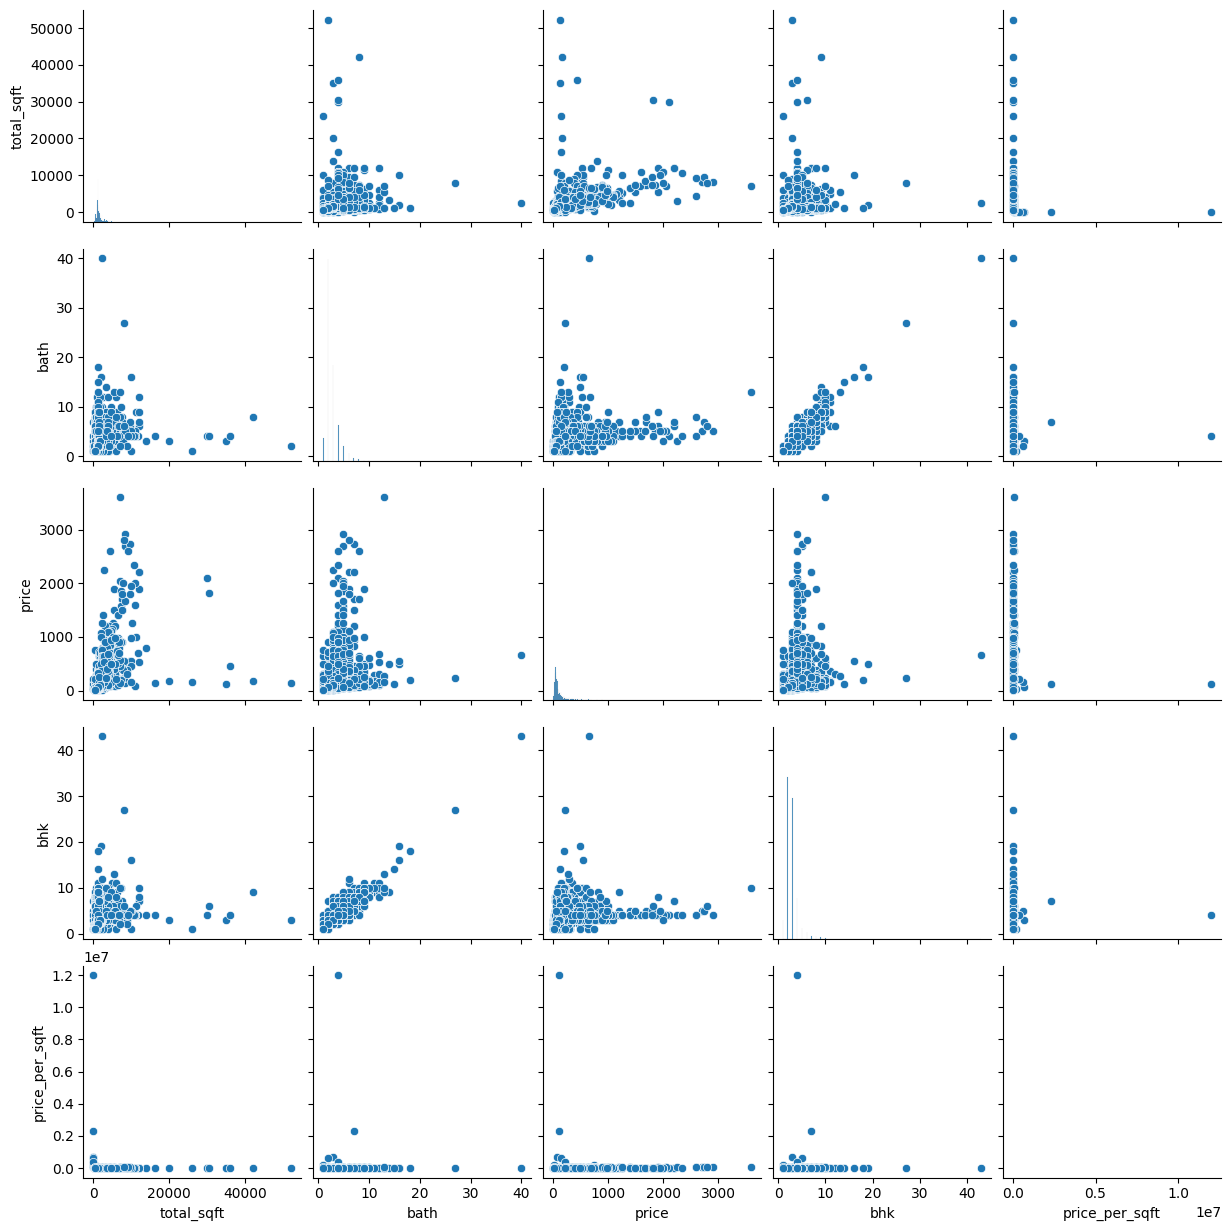

<Figure size 4000x4000 with 0 Axes>

In [ ]:
sns.pairplot(house_price_num)
plt.figure(figsize=(40,40))